In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io
import cv2

In [2]:
curr_dir = os.getcwd()
path = os.path.dirname(curr_dir)
print(path)
csv_file_path = os.path.join(path, 'dataset/DataCSV/multicam_full_h36m.csv')

/home/rasho/Falling-Person-Detection-based-On-AlphaPose


In [3]:
df = pd.read_csv(csv_file_path)
df = df.drop(['Unnamed: 0','idx'], axis=1)
#df = df.sort_values(['score'],ascending=False)

In [4]:
#df = df.drop_duplicates(subset = ['image_id','pos_class'], keep = 'first')
#df = df.sort_index()

In [5]:
df['pos_class'].value_counts()

Standing    37657
Falling     17286
Name: pos_class, dtype: int64

In [6]:
df.columns

Index(['image_id', 'pos_class', 'box', 'score', 'Hip_x', 'Hip_y', 'RHip_x',
       'RHip_y', 'RKnee_x', 'RKnee_y', 'RFoot_x', 'RFoot_y', 'LHip_x',
       'LHip_y', 'LKnee_x', 'LKnee_y', 'LFoot_x', 'LFoot_y', 'Spine_x',
       'Spine_y', 'Thorax_x', 'Thorax_y', 'Nose_x', 'Nose_y', 'Head_x',
       'Head_y', 'LShoulder_x', 'LShoulder_y', 'LElbow_x', 'LElbow_y',
       'LWrist_x', 'LWrist_y', 'RShoulder_x', 'RShoulder_y', 'RElbow_x',
       'RElbow_y', 'RWrist_x', 'RWrist_y'],
      dtype='object')

In [7]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,LElbow_x,LElbow_y,LWrist_x,LWrist_y,RShoulder_x,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,293.975372,130.948700,255.446533,140.014313,364.233826,133.215103,389.164246,128.682297,411.828278,103.751877
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,279.403351,135.917068,254.257401,139.196991,353.747955,138.103683,377.800598,127.170654,395.293457,103.117996
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,364.861847,123.353851,383.302460,101.839813,315.686920,135.647583,275.732300,141.794449,238.851105,147.941315
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,352.654419,123.260284,367.452179,105.502991,326.018494,146.936676,346.735321,126.219833,367.452179,105.502991
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,241.847382,148.376007,217.879974,157.363800,325.733307,145.380096,343.708862,118.416756,355.692566,100.441200


In [ ]:
#df = df.drop(['nose_x','nose_y','LEye_x',
#       'LEye_y', 'REye_x', 'REye_y', 'LEar_x', 'LEar_y', 'REar_x', 'REar_y'], axis=1)

In [ ]:
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]

#image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread('/home/rasho/Falling-Person-Detection-based-On-AlphaPose/input/Falling_Standing/FallingDown_01/00400.png')
image.shape

In [ ]:
box = df['box'][400]
box

In [ ]:
x = float(box.strip('[,]').split(',')[0])
y = float(box.strip('[,]').split(',')[1])
w = float(box.strip('[,]').split(',')[2])
h = float(box.strip('[,]').split(',')[3])

In [ ]:
plt.imshow(image)

In [ ]:
bbox = [x,x+w,y,y+h] #xmin,xmax,ymin,ymax
cv2.rectangle(image, (int(bbox[0]), int(bbox[2])), (int(bbox[1]),int(bbox[3])), (0,255), 3)
plt.imshow(image)

In [8]:
import math
def get_angle(x,y):
    #return angle in degrees
    return (math.atan2(y,x)*(180/math.pi))

In [9]:
df['foot_x'] = df['RFoot_x']-df['LFoot_x']
df['foot_y'] = df['RFoot_y']-df['LFoot_y']
df['angle_x']= df['Head_x']-df['foot_x']
df['angle_y']= df['Head_y']-df['foot_y']

In [10]:
df[['angle_x','angle_y']]

,angle_x,angle_y
0,289.442581,74.288666
1,331.881912,112.957722
2,332.590805,109.523376
3,333.417343,127.699608
4,234.357559,109.428955
...,...,...
54938,382.545227,34.212652
54939,384.252579,36.600586
54940,386.899506,38.859093
54941,675.058014,110.516590


In [18]:
df['angle']= df.apply(lambda row: get_angle(x = row['angle_x'], y = row['angle_y']), axis=1)

In [19]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,RShoulder_y,RElbow_x,RElbow_y,RWrist_x,RWrist_y,foot_x,foot_y,angle_x,angle_y,angle
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,133.215103,389.164246,128.682297,411.828278,103.751877,56.660034,36.262421,289.442581,74.288666,14.394882
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,138.103683,377.800598,127.170654,395.293457,103.117996,2.186584,6.559814,331.881912,112.957722,18.796272
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,135.647583,275.732300,141.794449,238.851105,147.941315,0.000000,3.073456,332.590805,109.523376,18.226904
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,146.936676,346.735321,126.219833,367.452179,105.502991,2.959564,11.838196,333.417343,127.699608,20.956955
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,145.380096,343.708862,118.416756,355.692566,100.441200,77.894073,26.963348,234.357559,109.428955,25.029358


In [54]:
df3 = df[['pos_class','angle']]
falling_angle  = df3.loc[(df3['pos_class']=='Falling')]
standing_angle = df3.loc[(df3['pos_class']=='Standing')]
falling_angle  = falling_angle.iloc[:160].to_numpy()
standing_angle = standing_angle.iloc[:160].to_numpy()

In [55]:
falling_angle

array([['Falling', 14.394882118491415],
       ['Falling', 18.796271865425034],
       ['Falling', 18.226904382251586],
       ['Falling', 20.956954558009706],
       ['Falling', 25.029358182148407],
       ['Falling', 26.955474531351236],
       ['Falling', 25.584162003968107],
       ['Falling', 28.829016640842664],
       ['Falling', 34.7709829542337],
       ['Falling', 38.18128436996973],
       ['Falling', 33.273860624666575],
       ['Falling', 30.872620632364068],
       ['Falling', 38.697820461850505],
       ['Falling', 28.794839858328164],
       ['Falling', 28.74600009714589],
       ['Falling', 33.25726222648221],
       ['Falling', 31.330602413106444],
       ['Falling', 28.90765857074281],
       ['Falling', 29.8389996157066],
       ['Falling', 28.774758318571795],
       ['Falling', 36.375262098792426],
       ['Falling', 31.43817997672181],
       ['Falling', 30.288518665228175],
       ['Falling', 30.27117483697732],
       ['Falling', 29.914324560098322],
       ['F

In [56]:
falling_angle[:,1].min()

14.394882118491415

In [57]:
falling_angle[:,1].max()

52.03103570528133

In [58]:
falling_angle[:,1].mean()

31.137818904077704

In [59]:
standing_angle

array([['Standing', 11.1698774080829],
       ['Standing', 11.191491970203492],
       ['Standing', 10.098257484351581],
       ['Standing', 9.95430320994252],
       ['Standing', 8.79129095733993],
       ['Standing', 8.738590175298048],
       ['Standing', 7.681828757629386],
       ['Standing', 6.3552498688786745],
       ['Standing', 5.989079372091881],
       ['Standing', 6.362966015426405],
       ['Standing', 6.079238797808761],
       ['Standing', 5.514797871919627],
       ['Standing', 6.428842456012668],
       ['Standing', 5.5415136353070205],
       ['Standing', 3.916154115134668],
       ['Standing', 2.67569419227148],
       ['Standing', 2.52075104276422],
       ['Standing', 3.0289487906029127],
       ['Standing', 2.8132920168402307],
       ['Standing', 4.8802997961329995],
       ['Standing', 5.620221225776943],
       ['Standing', 5.969843124385258],
       ['Standing', 5.562594230511572],
       ['Standing', 6.477747877322969],
       ['Standing', 6.687076297915296]

In [60]:
standing_angle[:,1].min()

2.52075104276422

In [61]:
standing_angle[:,1].max()

84.97957302268847

In [62]:
standing_angle[:,1].mean()

10.668062644294066

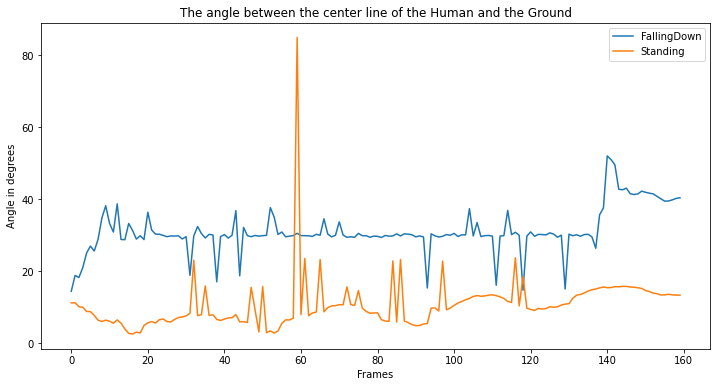

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_angle))
plt.plot(frames,falling_angle[:,1],label='FallingDown')
plt.plot(frames,standing_angle[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Angle in degrees')
plt.title('The angle between the center line of the Human and the Ground')
plt.legend()
plt.show()

In [36]:
df4 = df[['pos_class','score']]
falling_dist = df4.loc[(df4['pos_class']=='Falling')]
standing_dist = df4.loc[(df4['pos_class']=='Standing')]
falling_dist  = falling_dist.iloc[:160].to_numpy()
standing_dist = standing_dist.iloc[:160].to_numpy()

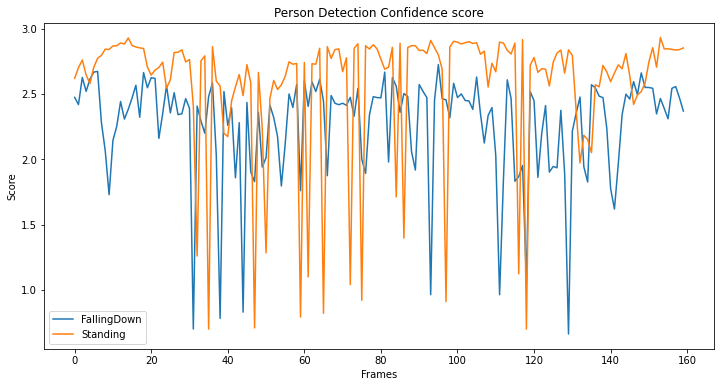

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_dist))
plt.plot(frames,falling_dist[:,1],label='FallingDown')
plt.plot(frames,standing_dist[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Score')
plt.title('Person Detection Confidence score')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
num_bins = 50
plt.hist(df4['score'],num_bins,density=True)
#plt.hist(stand[:,0],num_bins,density=True)
plt.show()

In [ ]:
df['score'].mean()

In [ ]:
df['score'].max()

In [ ]:
df['score'].min()

In [ ]:
plt.hist??

In [38]:
df['Knee_x'] = df['RKnee_x']- df['LKnee_x']
df['Knee_y'] = df['RKnee_y']- df['LKnee_y']
df['SK_x']= df['Spine_x']-df['Knee_x']
df['SK_y']= df['Spine_y']-df['Knee_y']
df['dist'] = np.sqrt(np.square(df['SK_x'])+np.square(df['SK_y']))

In [64]:
df4 = df[['pos_class','dist']]
falling_dist = df4.loc[(df4['pos_class']=='Falling')]
standing_dist = df4.loc[(df4['pos_class']=='Standing')]
falling_dist  = falling_dist.iloc[:160].to_numpy()
standing_dist = standing_dist.iloc[:160].to_numpy()

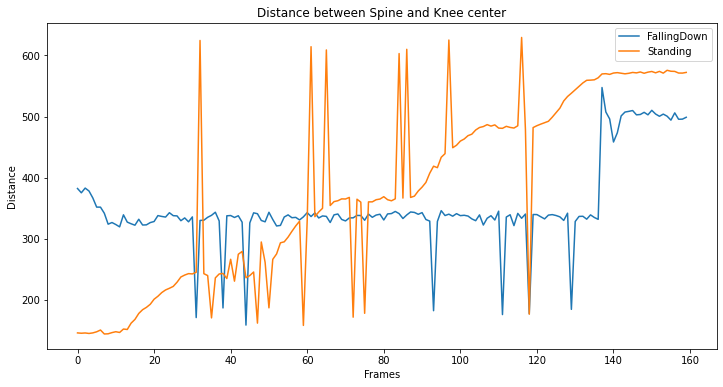

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frames = np.arange(0,len(falling_dist))
plt.plot(frames,falling_dist[:,1],label='FallingDown')
plt.plot(frames,standing_dist[:,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Distance')
plt.title('Distance between Spine and Knee center')
plt.legend()
plt.show()

In [ ]:
df4['dist'].mean()

In [ ]:
df4['dist'].min()

In [ ]:
df4['dist'].max()

In [66]:
#df4.loc[(df4['pos_class']=='NotFalls')&(df4['dist']<300)]
df4.loc[(df4['pos_class']=='Standing')&(df4['dist']<300)]

,pos_class,dist
17286,Standing,146.004979
17287,Standing,145.483508
17288,Standing,145.915671
17289,Standing,145.126100
17290,Standing,146.027987
...,...,...
54863,Standing,203.070017
54874,Standing,207.060440
54900,Standing,202.859455
54927,Standing,197.452868


In [67]:
def get_ratio(box):
    
    x = float(box.strip('[,]').split(',')[0])
    y = float(box.strip('[,]').split(',')[1])
    w = float(box.strip('[,]').split(',')[2])
    h = float(box.strip('[,]').split(',')[3])
    return w/h

In [68]:
df['box_ratio']=df['box'].map(get_ratio)

In [69]:
df['box_ratio'][5273]

2.1748634698414455

In [79]:
df5 = df[['pos_class','box_ratio']]
falling_ratio  = df5.loc[(df5['pos_class']=='Falling')]
standing_ratio = df5.loc[(df5['pos_class']=='Standing')]
falling_ratio  = falling_ratio.iloc[:3300].to_numpy()
standing_ratio = standing_ratio.iloc[:3300].to_numpy()

In [80]:
falling_ratio[:,1].mean()

1.2892600855498406

In [81]:
falling_ratio[:,1].max()

3.5189946749028334

In [82]:
falling_ratio[:,1].min()

0.1701728761333303

In [83]:
standing_ratio[:,1].mean()

0.5519166159501686

In [84]:
standing_ratio[:,1].max()

1.6853362543298394

In [85]:
standing_ratio[:,1].min()

0.2975383734710751

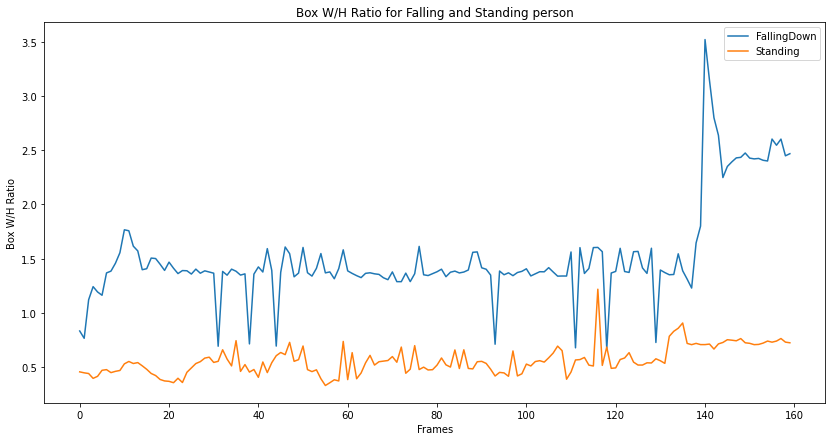

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(falling_ratio ))
plt.plot(frames[:160],falling_ratio[:160,1],label='FallingDown')
plt.plot(frames[:160],standing_ratio[:160,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Box W/H Ratio')
plt.title('Box W/H Ratio for Falling and Standing person')
plt.legend()
plt.show()

In [ ]:
df2 = df[['image_id','pos_class','box_ratio']]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')&(df2['box_ratio']>2)]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')&(df2['box_ratio']<2)]

In [ ]:
df2.loc[(df2['pos_class']=='Standing')&(df2['box_ratio']>2)]

In [ ]:
df2.loc[(df2['pos_class']=='FallingDown')& (df2['box_ratio']>0.95) | (df2['pos_class']=='Standing')& (df2['box_ratio']<0.95)]

In [ ]:
df2['pos_class'].unique

In [ ]:
x1_diff,y1_diff = feat_df['LShoulder_x']-feat_df['nose_x'],feat_df['LShoulder_y']-feat_df['nose_y']
x1y1_len = np.sqrt(np.square(x1_diff)+np.square(y1_diff))
x1,y1 = x1_diff/x1y1_len,y1_diff/x1y1_len
df['x1'] = x1
df['y1'] = y1

In [ ]:
x2_diff, y2_diff = feat_df['RShoulder_x']-feat_df['nose_x'],feat_df['RShoulder_y']-feat_df['nose_y']
x2y2_len = np.sqrt(np.square(x2_diff)+np.square(y2_diff))
x2, y2 = x2_diff/x2y2_len, y2_diff/x2y2_len
df['x2'] = x2
df['y2'] = y2

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df[df.iloc[:,30:].isna().any(axis=1)]

In [ ]:
df = df.dropna()

In [ ]:
df.isna().any()

In [ ]:
df.to_csv('data/victorized_res.csv')

In [ ]:
curr_dir = os.getcwd()
csv_file_path = os.path.join(curr_dir, 'data/res_with_flips.csv')

In [ ]:
df2 = pd.read_csv(csv_file_path)
df2 = df2.drop(['Unnamed: 0','idx'], axis=1)
df2 = df2.sort_values(['score'],ascending=False)

In [ ]:
df2 = df2.drop_duplicates(subset = ['image_id','pos_class'], keep = 'first')
df2 = df2.sort_index()
df2.head()

In [ ]:
df2

In [ ]:
df2.to_csv('data/clean_res_with_flips.csv')

In [ ]:
df.columns

In [87]:
def get_center(coord1, coord2):
    return (coord1+coord2)/2

In [88]:
# get center of Right Hip joint and Left Hip joint
df['HipCent_x'] = df.apply(lambda row: get_center(coord1=row['RHip_x'],coord2=row['LHip_x']), axis=1)
df['HipCent_y'] = df.apply(lambda row: get_center(coord1=row['RHip_y'],coord2=row['LHip_y']), axis=1)

In [89]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,angle_y,angle,Knee_x,Knee_y,SK_x,SK_y,dist,box_ratio,HipCent_x,HipCent_y
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,74.288666,14.394882,13.598419,6.799210,347.235802,159.845325,382.260683,0.832913,372.166229,201.207169
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,112.957722,18.796272,13.119629,4.373199,336.801758,165.436260,375.239364,0.765456,365.774277,202.608543
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,109.523376,18.226904,0.000000,3.073425,344.884537,166.381916,382.920730,1.120921,361.788422,201.726387
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,127.699608,20.956955,2.959534,2.959549,337.856697,169.873180,378.158757,1.241721,354.134201,201.688332
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,109.428955,25.029358,5.991852,2.995941,320.490433,178.335258,366.766386,1.192485,349.700714,212.788422


In [91]:
def get_vector(p1_x,p1_y,p2_x,p2_y):
    
    return p2_x-p1_x, p2_y-p1_y

In [92]:
#get waist, Spine2, Right thigh, Left Thigh, Right Calf, Left Calf vectors.
df['waist_x'], df['waist_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RHip_x'],p1_y=row['RHip_y'],p2_x=row['LHip_x'],p2_y=row['LHip_y']), axis=1))
df['Spine2_x'], df['Spine2_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['Thorax_x'],p1_y=row['Thorax_y'],p2_x=row['HipCent_x'],p2_y=row['HipCent_y']), axis=1))
df['Rthigh_x'], df['Rthigh_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RHip_x'],p1_y=row['RHip_y'],p2_x=row['RKnee_x'],p2_y=row['RKnee_y']), axis=1))
df['Lthigh_x'], df['Lthigh_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['LHip_x'],p1_y=row['LHip_y'],p2_x=row['LKnee_x'],p2_y=row['LKnee_y']), axis=1))
df['Rcalf_x'], df['Rcalf_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['RKnee_x'],p1_y=row['RKnee_y'],p2_x=row['RFoot_x'],p2_y=row['RFoot_y']), axis=1))
df['Lcalf_x'], df['Lcalf_y'] = zip(*df.apply(lambda row: get_vector(p1_x=row['LKnee_x'],p1_y=row['LKnee_y'],p2_x=row['LFoot_x'],p2_y=row['LFoot_y']), axis=1))


In [94]:
def get_vectorRatio(p1_x,p1_y,p2_x,p2_y):
    # add small number to numerator and denominator
    p1_len = np.sqrt(np.square(p1_x)+np.square(p1_y))
    p2_len = np.sqrt(np.square(p2_x)+np.square(p2_y))
    return (p1_len+0.00001)/(p2_len+0.00001)

In [95]:
df['SRatio'] = df.apply(lambda row: get_vectorRatio(p1_x=row['Spine2_x'],p1_y=row['Spine2_y'],p2_x=row['waist_x'],p2_y=row['waist_y']), axis=1)

In [96]:
df2 = df[['SRatio','pos_class']]

In [102]:
fall = df2.loc[(df2['pos_class']=='Falling')]
fall = fall.iloc[:4000].iloc[:,:1].to_numpy()

In [98]:
fall

array([], shape=(0, 1), dtype=float64)

In [103]:
stand = df2.loc[(df2['pos_class']=='Standing')]
stand = stand[:4000].iloc[:,:1].to_numpy()

In [104]:
stand

array([[2.57474462],
       [2.68477282],
       [2.86399377],
       ...,
       [3.47535807],
       [2.86913857],
       [1.88625199]])

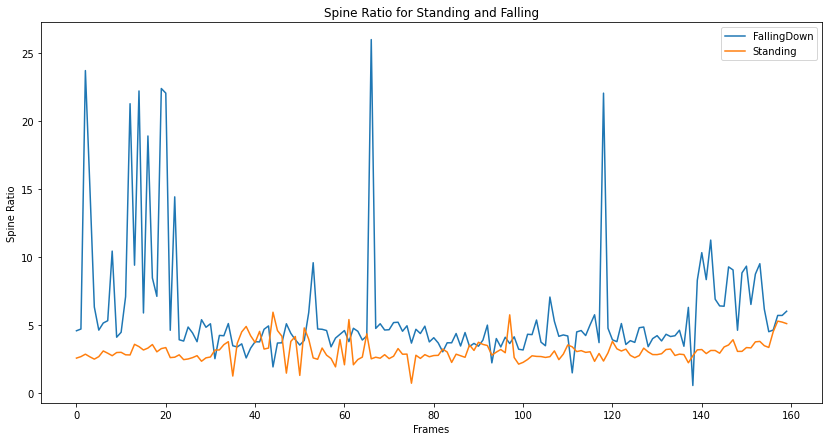

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,0],label='FallingDown')
plt.plot(frames[:160], stand[:160,0],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Spine Ratio')
plt.title('Spine Ratio for Standing and Falling')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
num_bins = 5
plt.hist(fall[:,0],num_bins,density=True)
plt.hist(stand[:,0],num_bins,density=True)
plt.show()

In [106]:
df.head()

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,Spine2_y,Rthigh_x,Rthigh_y,Lthigh_x,Lthigh_y,Rcalf_x,Rcalf_y,Lcalf_x,Lcalf_y,SRatio
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,69.125267,29.463226,40.795227,31.729614,33.996017,4.532806,52.127243,-38.528809,22.664032,4.585358
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,65.598167,30.612457,39.358887,32.799072,32.799088,8.746429,52.478531,19.679474,50.291916,4.712215
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,64.542091,36.881195,39.954620,36.881195,39.954636,12.293732,49.174942,12.293732,49.174911,23.706408
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,57.711205,38.474121,38.474152,38.474152,38.474152,14.797760,50.312332,14.797729,41.433685,15.186270
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,62.914444,29.959259,29.959259,35.951111,23.967407,20.971466,47.934814,-50.930756,23.967407,6.330364


In [107]:
df.columns

Index(['image_id', 'pos_class', 'box', 'score', 'Hip_x', 'Hip_y', 'RHip_x',
       'RHip_y', 'RKnee_x', 'RKnee_y', 'RFoot_x', 'RFoot_y', 'LHip_x',
       'LHip_y', 'LKnee_x', 'LKnee_y', 'LFoot_x', 'LFoot_y', 'Spine_x',
       'Spine_y', 'Thorax_x', 'Thorax_y', 'Nose_x', 'Nose_y', 'Head_x',
       'Head_y', 'LShoulder_x', 'LShoulder_y', 'LElbow_x', 'LElbow_y',
       'LWrist_x', 'LWrist_y', 'RShoulder_x', 'RShoulder_y', 'RElbow_x',
       'RElbow_y', 'RWrist_x', 'RWrist_y', 'foot_x', 'foot_y', 'angle_x',
       'angle_y', 'angle', 'Knee_x', 'Knee_y', 'SK_x', 'SK_y', 'dist',
       'box_ratio', 'HipCent_x', 'HipCent_y', 'waist_x', 'waist_y', 'Spine2_x',
       'Spine2_y', 'Rthigh_x', 'Rthigh_y', 'Lthigh_x', 'Lthigh_y', 'Rcalf_x',
       'Rcalf_y', 'Lcalf_x', 'Lcalf_y', 'SRatio'],
      dtype='object')

In [108]:
df['hip_v'] = df['HipCent_y'].diff(periods=5).abs()/4

In [109]:
df['spine_v'] = df['Spine_y'].diff(periods=5).abs()/4

In [110]:
df['head_v'] = df['Head_y'].diff(periods=5).abs()/4

In [111]:
df.isna().any()

image_id     False
pos_class    False
box          False
score        False
Hip_x        False
             ...  
Lcalf_y      False
SRatio       False
hip_v         True
spine_v       True
head_v        True
Length: 67, dtype: bool

In [112]:
df[df.iloc[:,30:].isna().any(axis=1)]

,image_id,pos_class,box,score,Hip_x,Hip_y,RHip_x,RHip_y,RKnee_x,RKnee_y,...,Lthigh_x,Lthigh_y,Rcalf_x,Rcalf_y,Lcalf_x,Lcalf_y,SRatio,hip_v,spine_v,head_v
0,01095.jpg,Falling,"[264.7388000488281, 97.85186004638672, 174.059...",2.473748,372.166229,201.207169,380.098633,201.207169,409.561859,242.002396,...,31.729614,33.996017,4.532806,52.127243,-38.528809,22.664032,4.585358,NaN,NaN,NaN
1,01096.jpg,Falling,"[270.8756103515625, 90.72824096679688, 167.931...",2.418112,365.774277,202.608543,373.427399,201.515244,404.039856,240.874130,...,32.799072,32.799088,8.746429,52.478531,19.679474,50.291916,4.712215,NaN,NaN,NaN
2,01097.jpg,Falling,"[205.35069274902344, 93.36463165283203, 236.03...",2.625777,361.788422,201.726387,361.788422,203.263107,398.669617,243.217728,...,36.881195,39.954636,12.293732,49.174942,12.293732,49.174911,23.706408,NaN,NaN,NaN
3,01098.jpg,Falling,"[207.93246459960938, 113.12434387207031, 227.2...",2.519368,354.134201,201.688332,355.613983,203.168106,394.088104,241.642258,...,38.474152,38.474152,14.797760,50.312332,14.797729,41.433685,15.186270,NaN,NaN,NaN
4,01099.jpg,Falling,"[206.1958465576172, 104.33092498779297, 230.08...",2.612864,349.700714,212.788422,355.692566,211.290466,385.651825,241.249725,...,35.951111,23.967407,20.971466,47.934814,-50.930756,23.967407,6.330364,NaN,NaN,NaN


In [113]:
df = df.dropna()

In [114]:
df.isna().any()

image_id     False
pos_class    False
box          False
score        False
Hip_x        False
             ...  
Lcalf_y      False
SRatio       False
hip_v        False
spine_v      False
head_v       False
Length: 67, dtype: bool

In [115]:
df5 = df[['pos_class','hip_v','spine_v','head_v']]
fall = df5.loc[(df5['pos_class']=='Falling')]
stand = df5.loc[(df5['pos_class']=='Standing')]
fall  = fall.iloc[:3300].to_numpy()
stand  = stand.iloc[:3300].to_numpy()

In [116]:
fall[:,1].min()

3.0517578125e-05

In [117]:
fall[:,1].mean()

5.2262316829508

In [118]:
fall[:,1].max()

86.84928512573242

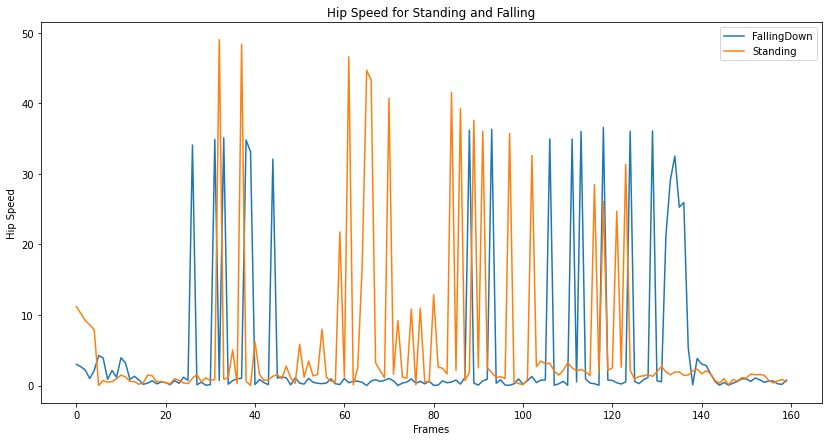

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,1],label='FallingDown')
plt.plot(frames[:160], stand[:160,1],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Hip Speed')
plt.title('Hip Speed for Standing and Falling')
plt.legend()
plt.show()

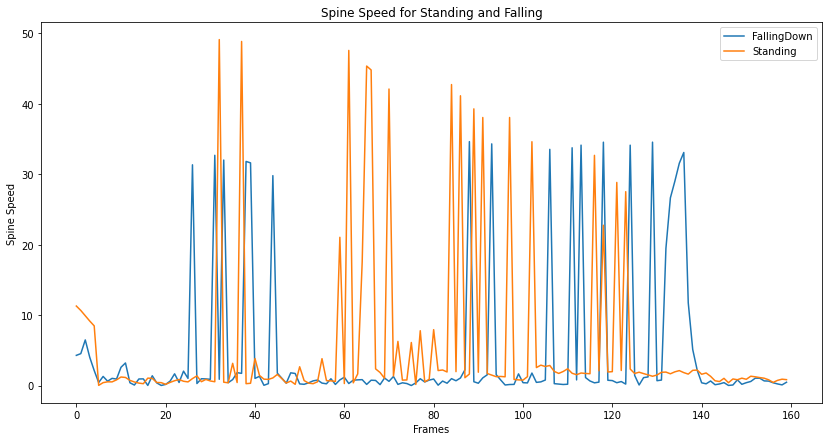

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,2],label='FallingDown')
plt.plot(frames[:160], stand[:160,2],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Spine Speed')
plt.title('Spine Speed for Standing and Falling')
plt.legend()
plt.show()

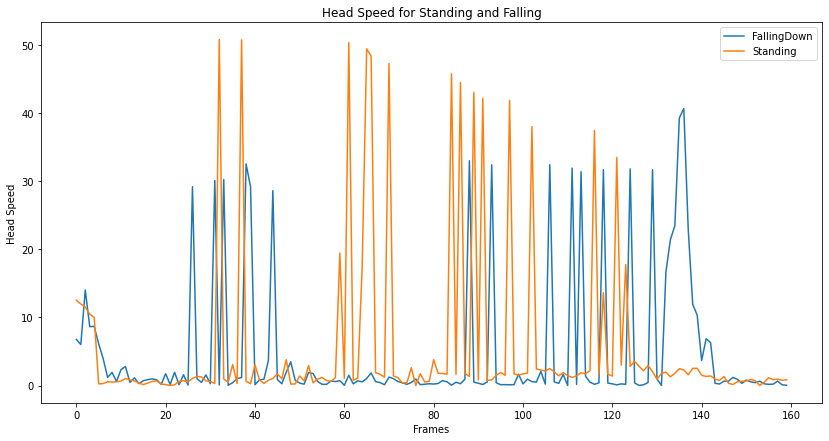

In [123]:
plt.figure(figsize=(14,7))
frames = np.arange(0,len(fall))
plt.plot(frames[:160],fall[:160,3],label='FallingDown')
plt.plot(frames[:160], stand[:160,3],label='Standing')
plt.xlabel('Frames')
plt.ylabel('Head Speed')
plt.title('Head Speed for Standing and Falling')
plt.legend()
plt.show()

In [126]:
n_frames = 5
pose2d_size =34
humanData = np.zeros([n_frames, pose2d_size])

In [128]:
humanData

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [130]:
pose = np.ones(34)

In [137]:
humanData[0,:]= pose

In [139]:
humanData

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])

In [138]:
humanData[1:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]])